In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [ ]:
rho = 1.
gamma = 0.01
nxx = 41
nx = nxx - 1  # Velocity nodes
nyy = 41      # Centroid nodes
ny = nyy - 1
Lx = 1.
Ly = 1.
dx = Lx/nx
dy = Ly/ny
eps = 1e-6

In [ ]:
xx = np.linspace(0, Lx, nxx)
yy = np.linspace(0, Ly, nyy)
x = np.linspace(0+dx/2, Lx-dx/2, nx)
y = np.linspace(0+dy/2, Ly-dy/2, ny)

In [ ]:
A = np.zeros((nx,ny))
B = np.zeros((nx,ny))
phi = np.zeros((nx, ny))

As shown above, there are two grids that will be referenced during the simulation. The double-letter grid tracks the edges of the control volumes where the velocity is stored. The single-letter grid tracks the control volume centroids, where the flux is stored.

The velocity is prescribed for this problem such that the streamfunction = $xy$, and therefore $u=x$ and $v=-y$.

In [ ]:
u = xx
v = -yy

In [ ]:
# Initialize phi at the CV centroids
phi = np.ones((nx, ny))

In [ ]:
# A and B are defined in my notes
A = np.zeros((nx,ny))
B = np.zeros((nx,ny))
for i in range(1, nx-1):
    for j in range(1, nx-1):
        A[i,j] = rho/2*((u[i+1]-u[i])*dy + (v[j+1]-v[j])*dx)
        B[i,j] = gamma*(-dy/(x[i+1]-x[i]) + dy/(x[i]-x[i-1]) - dx/(y[j+1]-y[j]) + dx/(y[i]-y[i-1]))

# Boundary Conditions

In [ ]:
# West boundary, x = 0. I will compute along the entire boundary. The corner nodes must be summed with other boundaries.
phi_west = np.zeros(ny)
phi_west = -y/Ly + 1

In [ ]:
phi_west

In [ ]:
for j in range(ny):
    A[0,j] = rho/2*((u[1]-0)*dy + (v[j+1]-v[j])*dx)
    if j == 0:
        B[0,j] = gamma*(-dy/(x[1]-x[0]) - dy/(xx[0]-x[0]) - dx/(y[j+1]-y[j]) - dx/(y[j]-yy[j]))
    elif j == ny-1:
        B[0,j] = gamma*(-dy/(x[1]-x[0]) - dy/(xx[0]-x[0]) - dx/(yy[j+1]-y[j]) - dx/(y[j]-y[j-1]))
    else:
        B[0,j] = gamma*(-dy/(x[1]-x[0]) - dy/(xx[0]-x[0]) - dx/(y[j+1]-y[j]) - dx/(y[j]-y[j-1]))
for j in range(ny):
    if j == 0:
        phi[0,j] += 1/(A[0,j]-B[0,j])*(gamma*(phi[1,j]*dy/(x[1]-x[0]) + phi_west[j]*dy/(x[0]-xx[0]) + 
                                   phi[0,j+1]*dy/(y[j+1]-y[j]) + phi[0,j]/(y[j]-yy[0])) -
                                      rho/2*((u[1]*phi[1,j]-0)*dy + (v[j+1]*phi[0,j+1]-v[j]*phi[0,j])*dx))
    elif j == ny-1:
        phi[0,j] = 1/(A[0,j]-B[0,j])*(gamma*(phi[1,j]*dy/(x[1]-x[0]) + phi_west[j]*dy/(x[0]-xx[0]) + 
                                   0*dy/(yy[-1]-y[j]) + phi[0,j-1]/(y[j]-y[j-1])) -
                                     rho/2*((u[1]*phi[1,j]-0)*dy + (v[j+1]*0-v[j]*phi[0,j-1])*dx))
    else:
        phi[0,j] = 1/(A[0,j]-B[0,j]) *(gamma*(phi[1,j]*dy/(x[1]-x[0]) + phi_west[j]*dy/(x[0]-xx[0]) + 
                                    phi[0,j+1]*dx/(y[j+1]-y[j]) + phi[0,j-1]*dx/(y[j]-y[j-1])) -
                                      rho/2*((u[1]*phi[1,j]-0)*dy + (v[j+1]*phi[0,j+1]-v[j]*phi[0,j-1])*dx))

In [ ]:
phi[0,:]

In [ ]:
plt.plot(phi[0,:])

In [ ]:
# North boundary, y = Ly
# phi_north = np.zeros(nx)
# A1 = np.zeros_like(phi_north)
# B2 = np.zeros_like(A1)
for i in range(nx):
    A[i,-1] = rho/2*((u[i+1]-u[i])*dx-v[-2]*dx) + eps
    if i == 0:
        B[i,-1] = gamma*(-dy/(x[1]-x[0]) - dy/(x[0]-xx[0]) - dx/(yy[-1]-y[-1]) - dx/(y[-1]-y[-2])) 
    elif i == nx-1:
        B[i,-1] = gamma*(-dy/(xx[-1]-x[-1]) - dy/(x[-1]-x[-2]) - dx/(yy[-1]-y[-1]) - dx/(y[-1]-y[-2]))
    else:
        B[i,-1] = gamma*(-dy/(x[i+1]-x[i]) - dy/(x[i]-x[i-1]) - dx/(yy[-1]-y[-1]) - dx/(y[-1]-y[-2])) 

for i in range(nx):
    if i == 0:
        phi[i,-1] += 1/(A[i,-1]-B[i,-1])*(gamma*(phi[i+1,-1]*dy/(x[i+1]-x[0]) + phi_west[-1]*dy/(x[i]-xx[i]) + phi[i,-2]*dx/(y[-1]-y[-2])) -
                                           rho/2*(u[i+1]*phi[i+1,-1]*dy - u[i]*phi_west[-1]*dy - v[-2]*phi[i,-2]*dx))
    elif i == nx-1:
        phi[i,-1] += 1/(A[i,-1]-B[i,-1])*(gamma*(phi[i,-1]*dy/(xx[i]-x[i]) + phi[i-1,-1]*dy/(x[i]-x[i-1]) + phi[i,-2]*dx/(y[-1]-y[-2])) -
                                           rho/2*(u[i+1]*phi[i,-1]*dy - u[i]*phi[i-1,-1]*dy - v[-2]*phi[i,-2]*dx))
    else:
        phi[i,-1] = 1/(A[i,-1]-B[i,-1])*(gamma*(phi[i+1,-1]*dy/(x[i+1]-x[i]) + phi[i-1,-1]*dy/(x[i]-x[i-1]) + phi[i,-2]*dx/(y[-1]-y[-2])) -
                                           rho/2*(u[i+1]*phi[i+1,-1]*dy - u[i]*phi[i-1,-1]*dy - v[-2]*phi[i,-2]*dx))

In [ ]:
phi[:,-1]

In [ ]:
plt.plot(phi[:,-1])

In [ ]:
# East boundary, x = Lx, no gradient
# phi_east = np.zeros(ny)
for j in range(ny):
    A[-1,j] = rho/2*((u[-1]-u[-2])*dx + (v[j+1]-v[j])*dx) + eps
    if j == 0:
        B[-1,j] = gamma*(-dy/(x[-1]-x[-2]) - dx/(y[j+1]-y[j]) - dx/(y[j]-yy[j]))
    elif j == ny-1:
        B[-1,j] = gamma*(-dy/(x[-1]-x[-2]) - dx/(yy[j]-y[j]) - dx/(y[j]-y[j-1])) 
    else:
        B[-1,j] = gamma*(-dy/(x[-1]-x[-2]) - dx/(y[j+1]-y[j]) - dx/(y[j]-y[j-1])) 
        
for j in range(ny):
    if j == 0:
        phi[-1,j] += 1/(A[-1,j]-B[-1,j])*(gamma*(phi[-2,j]*dy/(x[-1]-x[-2]) + phi[-1,j+1]*dx/(y[j+1]-y[j]) + phi[-1,j]*dx/(y[j]-yy[j])) -
                                    rho/2*(-u[-2]*phi[-2,j]*dy + v[j+1]*phi[-1,j+1]*dx - v[j]*phi[-1,j]*dx))
    elif j == ny-1:
        phi[-1,j] += 1/(A[-1,j]-B[-1,j])*(gamma*(phi[-2,j]*dy/(x[-1]-x[-2]) + 0*dx/(yy[j]-y[j]) + phi[-1,j-1]*dx/(y[j]-y[j-1])) -
                                    rho/2*(-u[-2]*phi[-2,j]*dy + v[j+1]*0*dx - v[j]*phi[-1,j-1]*dx))
    else:
        phi[-1,j] = 1/(A[-1,j]-B[-1,j])*(gamma*(phi[-2,j]*dy/(x[-1]-x[-2]) + phi[-1,j+1]*dx/(y[j+1]-y[j]) + phi[-1,j-1]*dx/(y[j]-y[j-1])) -
                                        rho/2*(-u[-2]*phi[-2,j]*dy + v[j+1]*phi[-1,j+1]*dx - v[j]*phi[-1,j-1]*dx))

In [ ]:
# South boundary, y = 0, no gradient
for i in range(nx):
    A[i,0] = rho/2*((u[i+1]-u[1])*dy + (v[-1]-v[-2])*dx) + eps
    if i == 0:
        B[i,0] = gamma*(-dy/(x[i+1]-x[i]) - dy/(x[i]-xx[i]) - dx/(y[1]-y[0]))
    elif i == nx-1:
        B[i,0] = gamma*(-dy/(xx[i]-x[i]) - dy/(x[i]-x[i-1]) - dx/(y[1]-y[0]))
    else:
        B[i,0] = gamma*(-dy/(x[i+1]-x[i]) - dy/(x[i]-x[i-1]) - dx/(y[1]-y[0]))

for i in range(nx):
    if i == 0:
        phi[i,0] += 1/(A[i,0]-B[i,0])*(gamma*(phi[i+1,0]*dy/(x[i+1]-x[i]) + phi_west[0]*dy/(x[i]-xx[i]) + phi[i,1]*dx/(y[1]-y[0])) - 
                                      rho/2*((u[i+1]*phi[i+1,0] - u[i]*phi_west[0])*dy - v[0]*phi[i,0]*dx))
    elif i == nx-1:
        phi[i,0] += 1/(A[i,0]-B[i,0])*(gamma*(phi[i,0]*dy/(xx[i]-x[i]) + phi[i-1,0]*dy/(x[i]-x[i-1]) + phi[i,1]*dx/(y[1]-y[0])) - 
                                      rho/2*((u[i+1]*phi[i,0] - u[i]*phi_west[0])*dy - v[0]*phi[i,0]*dx))
    else:
        phi[i,0] = 1/(A[i,0]-B[i,0])*(gamma*(phi[i+1,0]*dy/(x[i+1]-x[i]) + phi[i-1,0]*dy/(x[i]-x[i-1]) + phi[i,1]*dx/(y[1]-y[0])) - 
                                      rho/2*((u[i+1]*phi[i+1,0] - u[i]*phi[i-1,0])*dy - v[0]*phi[i-1,0]*dx))

In [ ]:
# Internal nodes excluding the boundaries
for i in range(1, nx-1):
    for j in range (1, ny-1):
        A[i,j] = rho/2*((u[i+1]-u[i])*dy + (v[j+1]-v[j])*dx) + eps
        B[i,j] = gamma*(-dy/(x[i+1]-x[i]) - dy/(x[i]-x[i-1]) - dx/(y[j+1]-y[j]) - dx/(y[i]-y[i-1]))
        phi[i,j] = 1/(A[i,j]-B[i,j])*(gamma*(phi[i+1,j]*dy/(x[i+1]-x[i]) + phi[i-1,j]*dy/(x[i]-x[i-1]) + phi[i,j+1]*dx/(y[j+1]-y[j]) + phi[i,j-1]*dx/(y[j]-y[j-1])) -
                                     rho/2*((u[i+1]*phi[i+1,j] - u[i]*phi[i-1,j])*dy - (v[j+1]*phi[i,j+1] - v[j]*phi[i,j-1])*dx))

In [ ]:
phi

In [ ]:
A-B

In [ ]:
(u[2]-u[1])*dy + (v[2]-v[1])*dx

In [ ]:
rho = 1.
gamma = 0.01
nxx = 101      # velocity nodes
nx = nxx - 1  # centroid nodes 
nyy = 101      
ny = nyy - 1
Lx = 1.
Ly = 1.
dx = Lx/nx
dy = Ly/ny
x = np.linspace(0+dx/2, Lx-dx/2, nx)
y = np.linspace(0+dy/2, Ly-dy/2, ny)
eps = 1e-6
phi_west = np.zeros(ny)
phi_west = -y/Ly + 1
n_iter =1
xx = np.linspace(0, Lx, nxx)
yy = np.linspace(0, Ly, nyy)
A = np.zeros((nx,ny))
B = np.zeros((nx,ny))
phi = np.zeros((nx, ny))
u = xx
v = -yy
for step in range(n_iter):
    
    # Internal nodes excluding the boundaries
    for i in range(1, nx-1):
        for j in range (1, ny-1):
            A[i,j] = rho/2*((u[i+1]-u[i])*dy + (v[j+1]-v[j])*dx) + eps
            B[i,j] = gamma*(-dy/(x[i+1]-x[i]) - dy/(x[i]-x[i-1]) - dx/(y[j+1]-y[j]) - dx/(y[i]-y[i-1]))
            phi[i,j] = 1/(A[i,j]-B[i,j])*(gamma*(phi[i+1,j]*dy/(x[i+1]-x[i]) + phi[i-1,j]*dy/(x[i]-x[i-1]) + phi[i,j+1]*dx/(y[j+1]-y[j]) + phi[i,j-1]*dx/(y[j]-y[j-1])) -
                                         rho/2*((u[i+1]*phi[i+1,j] - u[i]*phi[i-1,j])*dy - (v[j+1]*phi[i,j+1] - v[j]*phi[i,j-1])*dx))
    # West boundary 
    for j in range(ny):
        A[0,j] = rho/2*((u[1]-u[0])*dy + (v[j+1]-v[j])*dx) + eps
        if j == 0:
            B[0,j] = gamma*(-dy/(x[1]-x[0]) - dy/(x[0]-xx[0]) - dx/(y[j+1]-y[j]) - dx/(y[j]-yy[j]))
        elif j == ny-1:
            B[0,j] = gamma*(-dy/(x[1]-x[0]) - dy/(x[0]-xx[0]) - dx/(yy[j+1]-y[j]) - dx/(y[j]-y[j-1]))
        else:
            B[0,j] = gamma*(-dy/(x[1]-x[0]) - dy/(x[0]-xx[0]) - dx/(y[j+1]-y[j]) - dx/(y[j]-y[j-1]))
    for j in range(ny):
        if j == 0:
            phi[0,j] = 1/(A[0,j]-B[0,j])*(gamma*(phi[1,j]*dy/(x[1]-x[0]) + phi_west[j]*dy/(x[0]-xx[0]) + 
                                       phi[0,j+1]*dy/(y[j+1]-y[j]) + phi[0,j]*dy/(y[j]-yy[0])) -
                                          rho/2*((u[1]*phi[1,j]-0)*dy + (v[j+1]*phi[0,j+1]-v[j]*phi[0,j])*dx))
        elif j == ny-1:
            phi[0,j] = 1/(A[0,j]-B[0,j])*(gamma*(phi[1,j]*dy/(x[1]-x[0]) + phi_west[j]*dy/(x[0]-xx[0]) + 
                                       0*dy/(yy[-1]-y[j]) + phi[0,j-1]/(y[j]-y[j-1])) -
                                         rho/2*((u[1]*phi[1,j]-u[0]*phi_west[j])*dy + (v[j+1]*0-v[j]*phi[0,j-1])*dx))
        else:
            phi[0,j] = 1/(A[0,j]-B[0,j]) *(gamma*(phi[1,j]*dy/(x[1]-x[0]) + phi_west[j]*dy/(x[0]-xx[0]) + 
                                        phi[0,j+1]*dx/(y[j+1]-y[j]) + phi[0,j-1]*dx/(y[j]-y[j-1])) -
                                          rho/2*((u[1]*phi[1,j]-u[0]*phi_west[j])*dy + (v[j+1]*phi[0,j+1]-v[j]*phi[0,j-1])*dx))
            
            
    # North boundary, y = Ly VERIFIED
    for i in range(nx):
        A[i,-1] = rho/2*((u[i+1]-u[i])*dy + (v[-1]-v[-2])*dx) + eps
        if i == 0:
            B[i,-1] = gamma*(-dy/(x[i+1]-x[i]) - dy/(x[i]-xx[i]) - dx/(yy[-1]-y[-1]) - dx/(y[-1]-y[-2])) 
        elif i == nx-1:
            B[i,-1] = gamma*(-dy/(xx[i]-x[i]) - dy/(x[i]-x[i-1]) - dx/(yy[-1]-y[-1]) - dx/(y[-1]-y[-2]))
        else:
            B[i,-1] = gamma*(-dy/(x[i+1]-x[i]) - dy/(x[i]-x[i-1]) - dx/(yy[-1]-y[-1]) - dx/(y[-1]-y[-2])) 

    for i in range(nx):
        if i == 0:
            phi[i,-1] = 1/(A[i,-1]-B[i,-1])*(gamma*(phi[i+1,-1]*dy/(x[i+1]-x[0]) + phi_west[-1]*dy/(x[i]-xx[i]) + phi[i,-2]*dx/(y[-1]-y[-2])) -
                                               rho/2*(u[i+1]*phi[i+1,-1]*dy - u[i]*phi_west[-1]*dy - v[-2]*phi[i,-2]*dx))
        elif i == nx-1:
            phi[i,-1] = 1/(A[i,-1]-B[i,-1])*(gamma*(phi[i,-1]*dy/(xx[i]-x[i]) + phi[i-1,-1]*dy/(x[i]-x[i-1]) + phi[i,-2]*dx/(y[-1]-y[-2])) -
                                               rho/2*(u[i+1]*phi[i,-1]*dy - u[i]*phi[i-1,-1]*dy - v[-2]*phi[i,-2]*dx))
        else:
            phi[i,-1] = 1/(A[i,-1]-B[i,-1])*(gamma*(phi[i+1,-1]*dy/(x[i+1]-x[i]) + phi[i-1,-1]*dy/(x[i]-x[i-1]) + phi[i,-2]*dx/(y[-1]-y[-2])) -
                                               rho/2*(u[i+1]*phi[i+1,-1]*dy - u[i]*phi[i-1,-1]*dy - v[-2]*phi[i,-2]*dx))
            
    # East boundary, x = Lx, no gradient VERIFIED
    for j in range(ny):
        A[-1,j] = rho/2*((u[-1]-u[-2])*dx + (v[j+1]-v[j])*dx) + eps
        if j == 0:
            # No gradient at east or south boundaries
            B[-1,j] = gamma*(-0*dy/(xx[-1]-x[-1]) - dy/(x[-1]-x[-2]) - dx/(y[j+1]-y[j]) - 0*dx/(y[j]-yy[j]))
        elif j == ny-1:
            B[-1,j] = gamma*(-0*dy/(xx[-1]-x[-1]) - dy/(x[-1]-x[-2]) - dx/(yy[j]-y[j]) - dx/(y[j]-y[j-1])) 
        else:
            B[-1,j] = gamma*(-0*dy/(xx[-1]-x[-1]) - dy/(x[-1]-x[-2]) - dx/(y[j+1]-y[j]) - dx/(y[j]-y[j-1])) 

    for j in range(ny):
        if j == 0:
            # No gradient at east or south boundaries
            phi[-1,j] = 1/(A[-1,j]-B[-1,j])*(gamma*(0*dy/(xx[-1]-x[-1]) + phi[-2,j]*dy/(x[-1]-x[-2]) + phi[-1,j+1]*dx/(y[j+1]-y[j]) + 0*dx/(y[j]-yy[j])) -
                                        rho/2*(u[-1]*phi[-1,j]*dy - u[-2]*phi[-2,j]*dy + v[j+1]*phi[-1,j+1]*dx - v[j]*phi[-1,j]*dx))
        elif j == ny-1:
            # Prescribed zero phi condition on north boundary
            phi[-1,j] = 1/(A[-1,j]-B[-1,j])*(gamma*(phi[-1,j]*dy/(xx[-1]-x[-1]) + phi[-2,j]*dy/(x[-1]-x[-2]) + 0*dx/(yy[j]-y[j]) + phi[-1,j-1]*dx/(y[j]-y[j-1])) -
                                        rho/2*(u[-1]*phi[-1,j]*dy - u[-2]*phi[-2,j]*dy + v[j+1]*0*dx - v[j]*phi[-1,j-1]*dx))
        else:
            phi[-1,j] = 1/(A[-1,j]-B[-1,j])*(gamma*(phi[-1,j]*dy/(xx[-1]-x[-1]) + phi[-2,j]*dy/(x[-1]-x[-2]) + phi[-1,j+1]*dx/(y[j+1]-y[j]) + phi[-1,j-1]*dx/(y[j]-y[j-1])) -
                                            rho/2*(u[-1]*phi[-1,j]*dy - u[-2]*phi[-2,j]*dy + v[j+1]*phi[-1,j+1]*dx - v[j]*phi[-1,j-1]*dx)) 

    # South boundary, y = 0, no gradient
    for i in range(nx):
        A[i,0] = rho/2*((u[i+1]-u[1])*dy + (v[-1]-v[-2])*dx) + eps
        if i == 0:
            B[i,0] = gamma*(-dy/(x[i+1]-x[i]) - dy/(x[i]-xx[i]) - dx/(y[1]-y[0]) - 0*dx/(y[0]-yy[0]))
        elif i == nx-1:
            B[i,0] = gamma*(-dy/(xx[i]-x[i]) - dy/(x[i]-x[i-1]) - dx/(y[1]-y[0]) - 0*dx/(y[0]-yy[0]))
        else:
            B[i,0] = gamma*(-dy/(x[i+1]-x[i]) - dy/(x[i]-x[i-1]) - dx/(y[1]-y[0]) - 0*dx/(y[0]-yy[0]))

    for i in range(nx):
        if i == 0:
            phi[i,0] = 1/(A[i,0]-B[i,0])*(gamma*(phi[i+1,0]*dy/(x[i+1]-x[i]) + phi_west[0]*dy/(x[i]-xx[i]) + phi[i,1]*dx/(y[1]-y[0]) + 0*dx/(y[0]-yy[0])) - 
                                          rho/2*((u[i+1]*phi[i+1,0] - u[i]*phi_west[0])*dy + v[1]*phi[i,1]*dx - v[0]*phi[i,0]*dx))
        elif i == nx-1:
            phi[i,0] = 1/(A[i,0]-B[i,0])*(gamma*(phi[i,0]*dy/(xx[i]-x[i]) + phi[i-1,0]*dy/(x[i]-x[i-1]) + phi[i,1]*dx/(y[1]-y[0]) + 0*dx/(y[0]-yy[0])) - 
                                          rho/2*((u[i+1]*phi[i,0] - u[i]*phi[i-1,0])*dy + v[1]*phi[i,1]*dx - v[0]*phi[i,0]*dx))
        else:
            phi[i,0] = 1/(A[i,0]-B[i,0])*(gamma*(phi[i+1,0]*dy/(x[i+1]-x[i]) + phi[i-1,0]*dy/(x[i]-x[i-1]) + phi[i,1]*dx/(y[1]-y[0]) + 0*dx/(y[0]-yy[0])) - 
                                          rho/2*((u[i+1]*phi[i+1,0] - u[i]*phi[i-1,0])*dy + v[1]*phi[i,1]*dx - v[0]*phi[i,0]*dx))
    print(f'Step: {step}')

In [ ]:
phi

In [ ]:
X, Y = np.meshgrid(x, y)

In [ ]:
abs(A-B).min()

In [ ]:
yy[0]

In [67]:
rho = 1.
gamma = 0.01
nxx = 101      # velocity nodes
nx = nxx - 1  # centroid nodes 
nyy = 101      
ny = nyy - 1
Lx = 1.
Ly = 1.
dx = Lx/nx
dy = Ly/ny
x = np.linspace(0+dx/2, Lx-dx/2, nx)
y = np.linspace(0+dy/2, Ly-dy/2, ny)
eps = 1e-6
phi_west = np.zeros(ny)
phi_west = -y/Ly + 1
xx = np.linspace(0, Lx, nxx)
yy = np.linspace(0, Ly, nyy)
Ac_E = np.zeros((nx,ny))
Ac_W = np.zeros((nx,ny))
Ac_N = np.zeros((nx,ny))
Ac_S = np.zeros((nx,ny))
Ac_P = np.zeros((nx,ny))
Ad_E = np.zeros((nx,ny))
Ad_W = np.zeros((nx,ny))
Ad_N = np.zeros((nx,ny))
Ad_S = np.zeros((nx,ny))
Ad_P = np.zeros((nx,ny))
At_E = np.zeros((nx,ny))
At_W = np.zeros((nx,ny))
At_N = np.zeros((nx,ny))
At_S = np.zeros((nx,ny))
At_P = np.zeros((nx,ny))
phi = np.zeros((nx, ny))
u = xx
v = -yy
lam_w = np.zeros((nx,ny))
lam_e = np.zeros((nx,ny))
lam_n = np.zeros((nx,ny))
lam_s = np.zeros((nx,ny))
m_w = np.zeros((nx,ny))
m_e = np.zeros((nx,ny))
m_n = np.zeros((nx,ny))
m_s = np.zeros((nx,ny))

nsteps = 5000

# Internal nodes excluding the boundaries VERIFIED
for i in range(1, nx-1):
    for j in range (1, ny-1):
        # Calculate convection coefficients
        lam_w[i,j] = (xx[i] - x[i])/(x[i-1] - x[i])
        lam_e[i,j] = (xx[i+1] - x[i])/(x[i+1] - x[i])
        lam_n[i,j] = (yy[j+1] - y[j])/(y[j+1] - y[j])
        lam_s[i,j] = (yy[j] - y[j])/(y[j-1] - y[j])
        m_w[i,j] = rho*u[i]*dy
        m_e[i,j] = rho*u[i+1]*dy
        m_n[i,j] = rho*v[j+1]*dx
        m_s[i,j] = rho*v[j]*dx
        Ac_E[i,j] = m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] = m_w[i,j]*lam_w[i,j]
        Ac_N[i,j] = m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] = m_s[i,j]*lam_s[i,j]

        # Calculate diffusion coefficients
        Ad_E[i,j] = -gamma*dy/(x[i+1]-x[i])
        Ad_W[i,j] = -gamma*dy/(x[i]-x[i-1])
        Ad_N[i,j] = -gamma*dx/(y[j+1]-y[j])
        Ad_S[i,j] = -gamma*dx/(y[j]-y[j-1])

# Boundary Conditions

The corner nodes have overlap from the boundaries, and so they are additive (i.e. I use the $+=$ operator).

In [68]:
# West boundary, prescribed phi using a half-interval VERIFIED
for j in range(ny):
    i = 0
    lam_w[i,j] = (xx[i]-x[i])/(xx[i]-x[i])
    lam_e[i,j] = (xx[i+1]-x[i])/(x[i+1]-x[i])
    m_w[i,j] = rho*u[i]*dy   # Zero velocity on wall, so calculate west first
    m_e[i,j] = rho*u[i+1]*dy
    if j == 0:  ## SW corner node ##
        lam_s[i,j] = (yy[j]-y[j])/(yy[j]-y[j])
        lam_n[i,j] = (yy[j+1]-y[j])/(y[j+1]-y[j])
        m_n[i,j] += rho*v[j+1]*dx
        m_s[i,j] += rho*v[j]*dx
        Ac_N[i,j] += m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] += m_s[i,j]*lam_s[i,j]
        Ac_E[i,j] += m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] += m_w[i,j]*lam_w[i,j]
        
        Ad_S[i,j] += -gamma*dx/(y[j]-yy[j])
        Ad_E[i,j] += -gamma*dy/(x[i+1]-x[i])
        Ad_W[i,j] += -gamma*dy/(x[i]-xx[i])
        Ad_N[i,j] += -gamma*dx/(y[j+1]-y[j])
    elif j == ny-1:  ## NW corner node ##
        lam_n[i,j] = (yy[j+1]-y[j])/(yy[j+1]-y[j])
        lam_s[i,j] = (yy[j]-y[j])/(y[j-1]-y[j])
        m_n[i,j] += rho*v[j+1]*dx
        m_s[i,j] += rho*v[j]*dx
        Ac_N[i,j] += m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] += m_s[i,j]*lam_s[i,j]
        Ac_E[i,j] += m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] += m_w[i,j]*lam_w[i,j]
        
        Ad_N[i,j] += -gamma*dx/(yy[j+1]-y[j])
        Ad_E[i,j] += -gamma*dy/(x[i+1]-x[i])
        Ad_W[i,j] += -gamma*dy/(x[i]-xx[i])
        Ad_S[i,j] += -gamma*dx/(y[j]-y[j-1])
    else:
        lam_n[i,j] = (yy[j+1]-y[j])/(y[j+1]-y[j])
        lam_s[i,j] = (yy[j]-y[j])/(y[j-1]-y[j])
        m_n[i,j] = rho*v[j+1]*dx
        m_s[i,j] = rho*v[j]*dx
        
        # Convection coefficients
        Ac_E[i,j] = m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] = m_w[i,j]*lam_w[i,j]
        Ac_N[i,j] = m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] = m_s[i,j]*lam_s[i,j]

        # Diffusion coefficients
        Ad_E[i,j] = -gamma*dy/(x[i+1]-x[i])
        Ad_W[i,j] = -gamma*dy/(x[i]-xx[i])
        Ad_N[i,j] = -gamma*dx/(y[j+1]-y[j])
        Ad_S[i,j] = -gamma*dx/(y[j]-y[j-1])

In [69]:
# North boundary, prescribed phi using a half-interval 
for i in range(nx):
    j = -1
    lam_n[i,j] = (yy[j+1]-y[j])/(yy[j+1]-y[j])
    lam_s[i,j] = (yy[j]-y[j])/(y[j-1]-y[j])
    m_n[i,j] = rho*v[j+1]*dx
    m_s[i,j] = rho*v[j]*dx
    if i == 0: ## NW corner node ##
        lam_w[i,j] = (xx[i]-x[i])/(xx[i]-x[i])
        lam_e[i,j] = (xx[i+1]-x[i])/(x[i+1]-x[i])
        m_w[i,j] += rho*u[i]*dy
        m_e[i,j] += rho*u[i+1]*dy
        Ac_N[i,j] += m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] += m_s[i,j]*lam_s[i,j]
        Ac_E[i,j] += m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] += m_w[i,j]*lam_w[i,j]
        
        Ad_W[i,j] += -gamma*dy/(x[i]-xx[i])
        Ad_E[i,j] += -gamma*dy/(x[i+1]-x[i])
        Ad_N[i,j] += -gamma*dx/(yy[j+1]-y[j])
        Ad_S[i,j] += -gamma*dx/(y[j]-y[j-1])
    elif i == nx-1: ## NE corner node ##
        lam_e[i,j] = (xx[i+1]-x[i])/(xx[i+1]-x[i])
        lam_w[i,j] = (xx[i]-x[i])/(x[i-1]-x[i])
        m_e[i,j] += rho*u[i+1]*dy
        m_w[i,j] += rho*u[i]*dy
        Ac_E[i,j] += m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] += m_w[i,j]*lam_w[i,j]
        Ac_N[i,j] += m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] += m_s[i,j]*lam_s[i,j]
        
        Ad_E[i,j] += -gamma*dy/(xx[i+1]-x[i])
        Ad_W[i,j] += -gamma*dy/(x[i]-x[i-1])
        Ad_N[i,j] += -gamma*dx/(yy[j+1]-y[j])
        Ad_S[i,j] += -gamma*dx/(y[j]-y[j-1])
    else:
        # Convection coefficients
        lam_w[i,j] = (xx[i] - x[i])/(x[i-1] - x[i])
        lam_e[i,j] = (xx[i+1] - x[i])/(x[i+1] - x[i])
        m_w[i,j] = rho*u[i]*dy
        m_e[i,j] = rho*u[i+1]*dy
        Ac_E[i,j] = m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] = m_w[i,j]*lam_w[i,j]
        Ac_N[i,j] = m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] = m_s[i,j]*lam_s[i,j]
        
        # Diffusion coefficients
        Ad_E[i,j] = -gamma*dy/(x[i+1]-x[i])
        Ad_W[i,j] = -gamma*dy/(x[i]-x[i-1])
        Ad_N[i,j] = -gamma*dx/(yy[j+1]-y[j])
        Ad_S[i,j] = -gamma*dx/(y[j]-y[j-1])

In [70]:
# East boundary, zero gradient
for j in range(ny):
    i = -1
    lam_e[i,j] = (xx[i+1]-x[i])/(xx[i+1]-x[i])
    lam_w[i,j] = (xx[i]-x[i])/(x[i-1]-x[i])
    m_e[i,j] = rho*u[i+1]*dy
    m_w[i,j] = rho*u[i]*dy
    if j == 0: # SE corner node ##
        lam_s[i,j] = (yy[j]-y[j])/(yy[j]-y[j])
        lam_n[i,j] = (yy[j+1]-y[j])/(y[j+1]-y[j])
        m_s[i,j] += rho*v[j]*dx
        m_n[i,j] += rho*v[j+1]*dx
        Ac_E[i,j] += m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] += m_w[i,j]*lam_w[i,j]
        Ac_N[i,j] += m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] += m_s[i,j]*lam_s[i,j]
        
        Ad_S[i,j] += -gamma*dx/(y[j]-yy[j])
        Ad_E[i,j] += 0.
        Ad_W[i,j] += -gamma*dy/(x[i]-x[i-1])
        Ad_N[i,j] += -gamma*dx/(y[j+1]-y[j])
    elif j == nx-1: ## NE corner node ##
        lam_n[i,j] = (yy[j+1]-y[j])/(yy[j+1]-y[j])
        lam_s[i,j] = (yy[j]-y[j])/(y[j-1]-y[j])
        m_n[i,j] += rho*v[j+1]*dx
        m_s[i,j] += rho*v[j]*dx
        Ac_E[i,j] += m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] += m_w[i,j]*lam_w[i,j]
        Ac_N[i,j] += m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] += m_s[i,j]*lam_s[i,j]
        
        Ad_N[i,j] += -gamma*dx/(yy[j+1]-y[j])
        Ad_E[i,j] += 0.
        Ad_W[i,j] += -gamma*dy/(x[i]-x[i-1])
        Ad_S[i,j] += -gamma*dx/(y[j]-y[j-1])
    else:
        # Convection coefficients
        lam_n[i,j] = (yy[j+1]-y[j])/(y[j+1]-y[j])
        lam_s[i,j] = (yy[j]-y[j])/(y[j-1]-y[j])
        m_n[i,j] = rho*v[j+1]*dx
        m_s[i,j] = rho*v[j]*dx
        Ac_E[i,j] = m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] = m_w[i,j]*lam_w[i,j]
        Ac_N[i,j] = m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] = m_s[i,j]*lam_s[i,j]
        
        # Diffusion coefficients
        Ad_E[i,j] = 0.
        Ad_W[i,j] = -gamma*dy/(x[i]-x[i-1])
        Ad_N[i,j] = -gamma*dx/(y[j+1]-y[j])
        Ad_S[i,j] = -gamma*dx/(y[j]-y[j-1])

In [71]:
# South boundary, zero gradient
for i in range(nx):
    j = 0
    lam_s[i,j] = (yy[j]-y[j])/(yy[j]-y[j])
    lam_n[i,j] = (yy[j+1]-y[j])/(y[j+1]-y[j])
    m_s[i,j] = rho*v[j]*dx
    m_n[i,j] = rho*v[j+1]*dx
    if i == 0: ## SW corner node ##
        lam_w[i,j] = (xx[i]-x[i])/(xx[i]-x[i])
        lam_e[i,j] = (xx[i+1]-x[i])/(x[i+1]-x[i])
        m_w[i,j] += rho*u[i]*dy
        m_e[i,j] += rho*u[i+1]*dy
        Ac_E[i,j] += m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] += m_w[i,j]*lam_w[i,j]
        Ac_N[i,j] += m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] += m_s[i,j]*lam_s[i,j]
        
        Ad_W[i,j] += -gamma*dx/(x[i]-xx[i])
        Ad_S[i,j] += 0.
        Ad_N[i,j] += -gamma*dx/(y[j+1]-y[j])
        Ad_E[i,j] += -gamma*dy/(x[i+1]-x[i])
        
    elif i == nx-1: ## SE corner node ##
        lam_e[i,j] = (xx[i+1]-x[i])/(xx[i+1]-x[i])
        lam_w[i,j] = (xx[i]-x[i])/(x[i-1]-x[i])
        m_e[i,j] += rho*u[i+1]*dy
        m_w[i,j] += rho*u[i]*dy
        Ac_E[i,j] += m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] += m_w[i,j]*lam_w[i,j]
        Ac_N[i,j] += m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] += m_s[i,j]*lam_s[i,j]
        
        Ad_E[i,j] += -gamma*dx/(xx[i+1]-x[i])
        Ad_S[i,j] = 0.
        Ad_W[i,j] += -gamma*dy/(x[i]-x[i-1])
        Ad_N[i,j] += -gamma*dx/(y[j+1]-y[j])
    else:
        # Convection coefficients
        lam_e[i,j] = (xx[i+1]-x[i])/(x[i+1]-x[i])
        lam_w[i,j] = (xx[i]-x[i])/(x[i-1]-x[i])
        m_e[i,j] = rho*u[i+1]*dy
        m_w[i,j] = rho*u[i]*dy
        Ac_E[i,j] = m_e[i,j]*lam_e[i,j]
        Ac_W[i,j] = m_w[i,j]*lam_w[i,j]
        Ac_N[i,j] = m_n[i,j]*lam_n[i,j]
        Ac_S[i,j] = m_s[i,j]*lam_s[i,j]
        
        # Diffusion coefficients
        Ad_S[i,j] = 0.
        Ad_W[i,j] = -gamma*dy/(x[i]-x[i-1])
        Ad_N[i,j] = -gamma*dx/(y[j+1]-y[j])
        Ad_E[i,j] = -gamma*dy/(x[i+1]-x[i])

In [72]:
# Totals
Ad_P = -(Ad_E + Ad_W + Ad_N + Ad_S)
Ac_P = -(Ac_E + Ac_W + Ac_N + Ac_S)
At_E = Ac_E + Ad_E
At_W = Ac_W + Ad_W
At_N = Ac_N + Ad_N
At_S = Ac_S + Ad_S
At_P = Ac_P + Ad_P

In [73]:
for step in range(nsteps):    
    phi_old = np.copy(phi)
    # Interior node phi calculation
    for i in range(1, nx-1):
        for j in range (1, ny-1):
            phi[i,j] = -(At_W[i,j]*phi[i-1,j] + At_E[i,j]*phi[i+1,j] + At_N[i,j]*phi[i,j+1] + At_S[i,j]*phi[i,j-1])/At_P[i,j]

    # West boundary phi calculation
    for j in range(ny):
        i = 0
        if j == 0:
            phi[i,j] = -(At_W[i,j]*phi_west[j] + At_E[i,j]*phi[i+1,j] + At_N[i,j]*phi[i,j+1])/(At_P[i,j]+At_S[i,j])
        elif j == ny-1:
            phi[i,j] = -(At_W[i,j]*phi_west[j] + At_E[i,j]*phi[i+1,j] + At_N[i,j]*0*phi[i,j] + At_S[i,j]*phi[i,j-1])/At_P[i,j]
        else:
            phi[i,j] = -(At_W[i,j]*phi_west[j] + At_E[i,j]*phi[i+1,j] + At_N[i,j]*phi[i,j+1] + At_S[i,j]*phi[i,j-1])/At_P[i,j]

    # North boundary phi calculation
    for i in range(nx):
        j = -1
        if i == 0:
            phi[i,j] = -(At_W[i,j]*phi_west[j] + At_E[i,j]*phi[i+1,j] + At_N[i,j]*0*phi[i,j] + At_S[i,j]*phi[i,j-1])/At_P[i,j]
        elif i == nx-1:
            phi[i,j] = -(At_W[i,j]*phi[i-1,j] + At_N[i,j]*0*phi[i,j] + At_S[i,j]*phi[i,j-1])/(At_P[i,j]+At_E[i,j])
        else:
            phi[i,j] = -(At_W[i,j]*phi[i-1,j] + At_E[i,j]*phi[i+1,j] + At_N[i,j]*0*phi[i,j] + At_S[i,j]*phi[i,j-1])/At_P[i,j]

    # East boundary phi calculation
    for j in range(ny):
        i = -1
        if j == 0:
            phi[i,j] = -(At_W[i,j]*phi[i-1,j] + At_E[i,j]*phi[i,j] + At_N[i,j]*phi[i,j+1] + At_S[i,j]*phi[i,j])/(At_P[i,j]+At_E[i,j])
        elif j == ny-1:
            phi[i,j] = -(At_W[i,j]*phi[i-1,j] + At_N[i,j]*0*phi[i,j] + At_S[i,j]*phi[i,j-1])/(At_P[i,j]+At_E[i,j])
        else:
            phi[i,j] = -(At_W[i,j]*phi[i-1,j] + At_N[i,j]*phi[i,j+1] + At_S[i,j]*phi[i,j-1])/(At_P[i,j]+At_E[i,j])

    # South boundary phi calculation
    for i in range(nx):
        j = 0
        if i == 0:
            phi[i,j] = -(At_W[i,j]*phi_west[j] + At_E[i,j]*phi[i+1,j] + At_N[i,j]*phi[i,j+1])/(At_P[i,j]+At_S[i,j])
        elif i == nx-1:
            phi[i,j] = -(At_W[i,j]*phi[i-1,j] + At_E[i,j]*phi[i,j] + At_N[i,j]*phi[i,j+1])/(At_P[i,j]+At_S[i,j])
        else:
            phi[i,j] = -(At_W[i,j]*phi[i-1,j] + At_E[i,j]*phi[i+1,j] + At_N[i,j]*phi[i,j+1])/(At_P[i,j]+At_S[i,j])

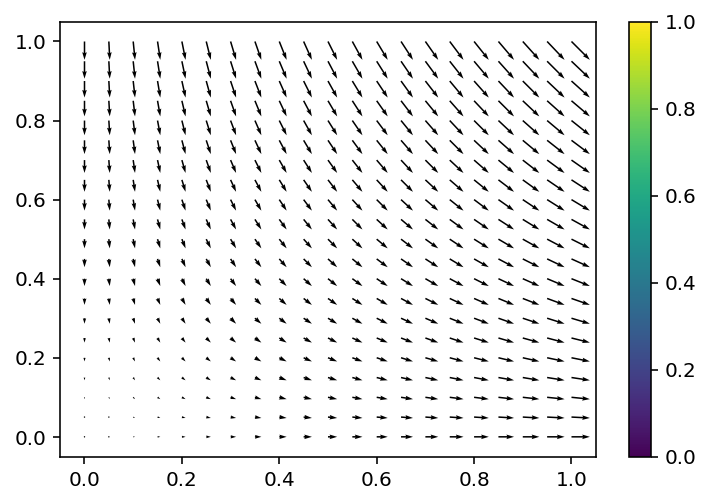

In [74]:
X, Y = np.meshgrid(x, y)
XX, YY = np.meshgrid(xx, yy)
plt.quiver(XX[::5,::5],YY[::5,::5], XX[::5,::5] , -YY[::5,::5])
plt.colorbar()

Text(0, 0.5, 'Y')

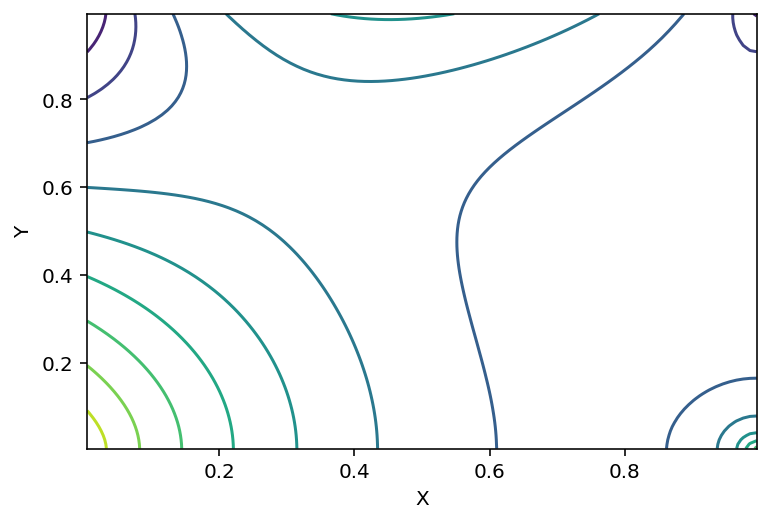

In [75]:
plt.contour(X.T, Y.T, phi, levels=10)
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
At_P

In [ ]:
Ac_W[:,-1]

In [ ]:
dx